In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('./FIFA18_players_database/clean_data.csv')
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,73,66,75,69,75,65,66,74,73,64,...,70,79,28,68,68,33,48,70,64,CM
1,56,40,59,58,65,61,53,54,61,52,...,64,66,55,55,53,52,68,55,55,CM
2,55,72,58,59,60,61,52,37,56,52,...,64,57,62,54,74,64,76,57,42,LB
3,65,30,61,55,53,50,34,38,44,61,...,46,50,22,63,77,21,71,48,41,ST
4,75,75,78,73,74,66,67,58,75,61,...,74,80,74,86,84,72,58,70,60,CM


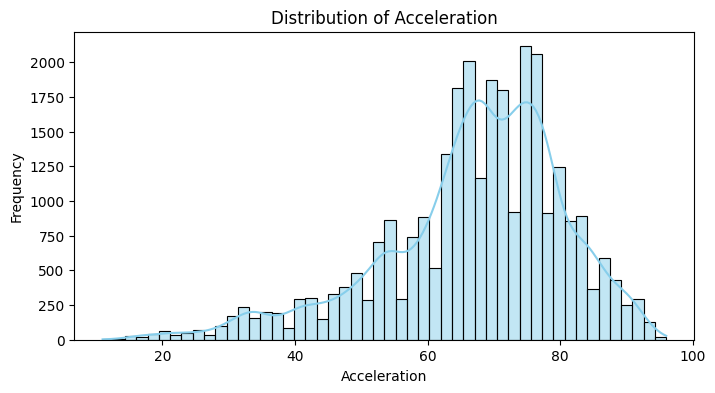

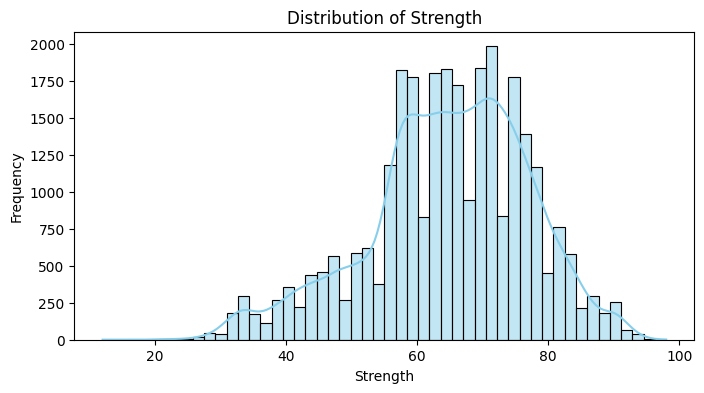

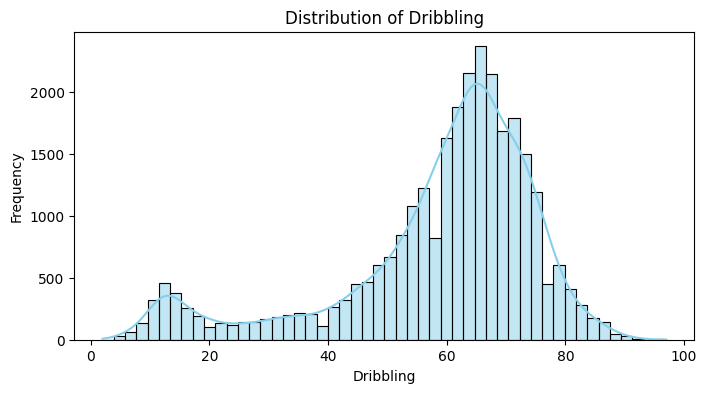

In [37]:
columns_to_plot = ['Acceleration', 'Strength', 'Dribbling']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

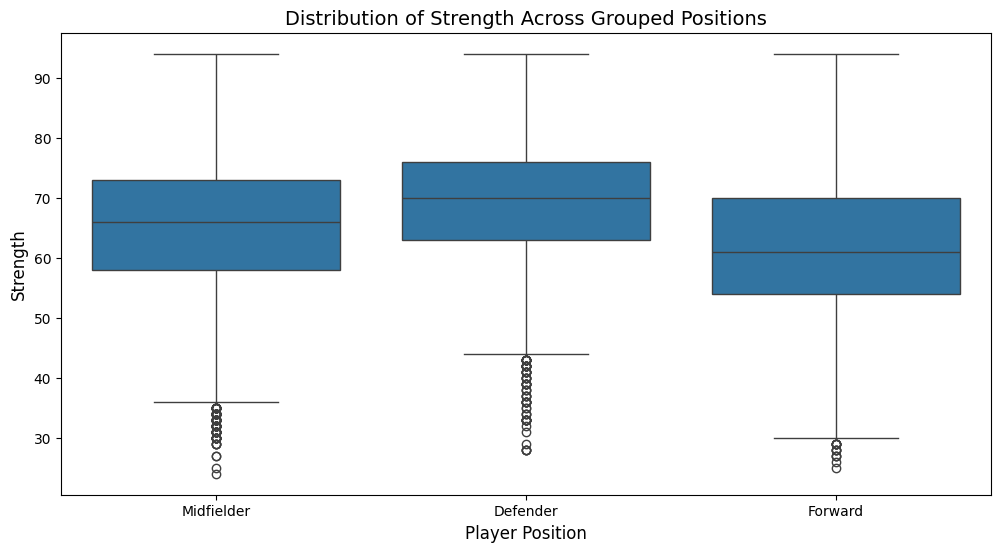

In [38]:
position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'GK': 'Goalkeeper'
}

df['Grouped Positions'] = df['Preferred Positions'].map(position_mapping)

# Gör en box plot för de grupperade positionerna
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grouped Positions', y='Strength')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Distribution of Strength Across Grouped Positions', fontsize=14)
plt.show()


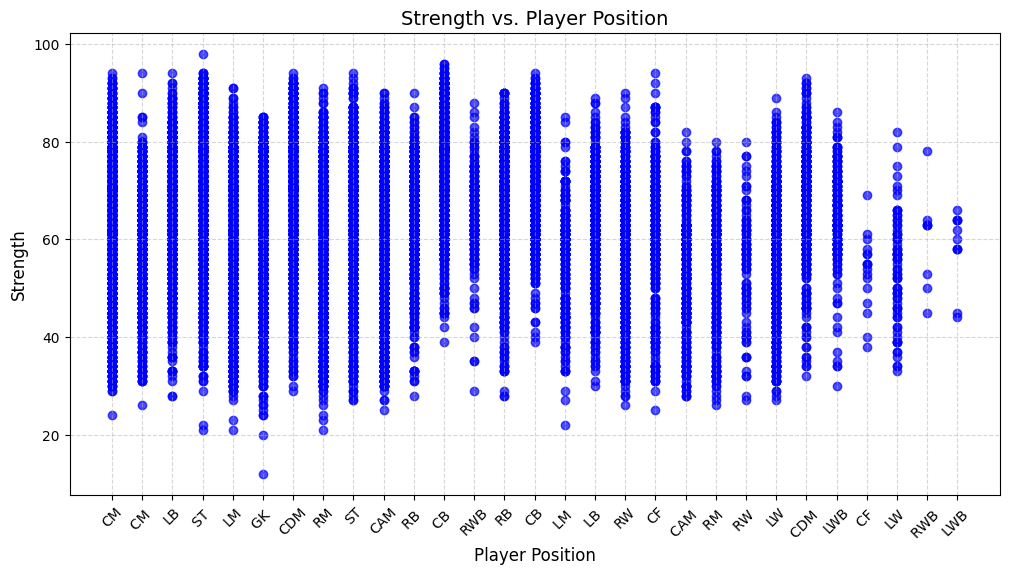

In [39]:
# Skapa en scatter plot
plt.figure(figsize=(12, 6))
positions = df['Preferred Positions']  # X-axel
strength = df['Strength']  # Y-axel

plt.scatter(positions, strength, alpha=0.7, color='blue')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Strength vs. Player Position', fontsize=14)
plt.xticks(rotation=45)  # Roterar X-tick labels för bättre läsbarhet
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can clearly see that Strength is a clear attribute for defensive positions.